<a href="https://colab.research.google.com/github/Armanskij/EBAC_Studies/blob/main/Profissao_Analista_de_dados_M14_Exercicio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados I
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

Elaborado por [Douglas Rizzi](https://www.linkedin.com/in/douglas-rizzi/)

---

# **Tópicos**

<ol type="1">
  <li>Pacote Seaborn;</li>
  <li>Categorias: Gráficos de Barras e de Setores;</li>
  <li>Tendências: Gráficos de Linha e de Área.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preço do diamante por tipo de corte

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#carregando o dt set e visualizando-o
data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
# selecionando as colunas, agrupando-as e somando o resultado

diamonds = data[['cut', 'price']].groupby(['cut']).agg('sum').reset_index()
diamonds

,cut,price
0,Ideal,74513487
1,Premium,63221498
2,Very Good,48107623
3,Good,19275009
4,Fair,7017600


In [3]:
#contando quantos diamantes da cada corte temos

contagem_df = data[['cut']].value_counts().reset_index()
contagem_df.columns = ['cut','amount']
contagem_df

,cut,amount
0,Ideal,21551
1,Premium,13791
2,Very Good,12082
3,Good,4906
4,Fair,1610


In [4]:
#juntado os df de preço, quantidade e média

df_final = pd.merge(diamonds, contagem_df, on='cut')
df_final['mean'] = round(df_final['price']/df_final['amount'],2)
df_final


,cut,price,amount,mean
0,Ideal,74513487,21551,3457.54
1,Premium,63221498,13791,4584.26
2,Very Good,48107623,12082,3981.76
3,Good,19275009,4906,3928.86
4,Fair,7017600,1610,4358.76


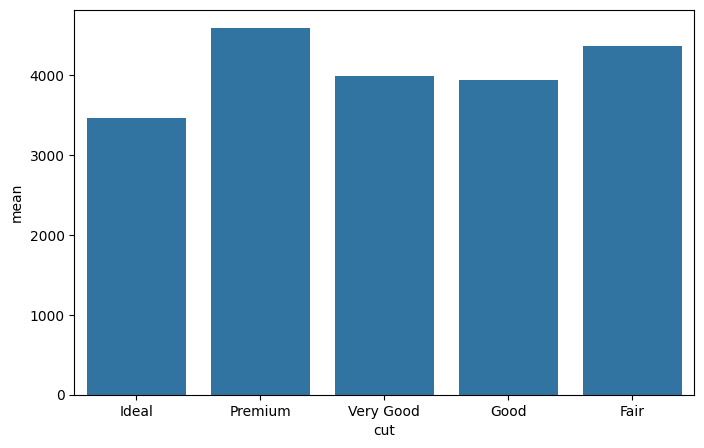

In [5]:
#criando o gráfico
plt.figure(figsize=(8,5))
grafico_1 = sns.barplot(data=df_final, x='cut', y='mean')

<ipython-input-17-498dcfe54f6f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico_1a = sns.barplot(x='cut', y='price', data=diamonds.groupby('cut').agg({'price': 'mean'}).reset_index(), palette='viridis')


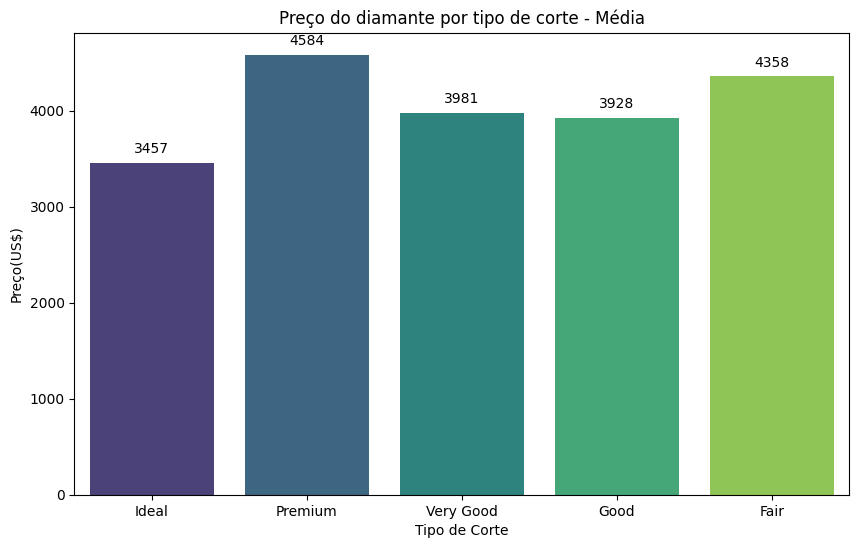

In [17]:
# @title Resolução

diamonds = sns.load_dataset('diamonds')

# Criando o gráfico à partir do df original
plt.figure(figsize=(10, 6))
grafico_1a = sns.barplot(x='cut', y='price', data=diamonds.groupby('cut').agg({'price': 'mean'}).reset_index(), palette='viridis')

# Adicionando rotulos para melhorar a comprencao
for p in grafico_1a.patches:
    grafico_1a.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
#inserindo legendas
plt.title('Preço do diamante por tipo de corte - Média')
plt.xlabel('Tipo de Corte')
plt.ylabel('Preço(US$)')
plt.show()


**Insight do Gráfico 1**:
>Após analisar a média dos preços de cada tipo de corte de diamante e levando em conta a clasificação AGS (American Gem Society) notamos que:


*   A média do preço do corte Ideal (melhor qualidade), é a menor entre todos os tipos, provavelmente por sua grande oferta (21k).
*   Já o corte Premium tem o maior valor médio dentre todos, devido ao fato de sua oferta ser média (13k) e sua procura muito próxima ao do corte Ideal.
*   Os cortes Very Good e Good têm seus valore muito próximos, e o corte Fair (menor qualidade) tem uma média de preço mais elevada pois a quantidade de amostras desse tipo é bem pequena (cerca de 1k)

>Para uma análise mais profunda podemos levar em conta o peso(quilates), cor, clareza e ainda quesitos como a situação do mercado de jóias e os nichos de mercado.


---
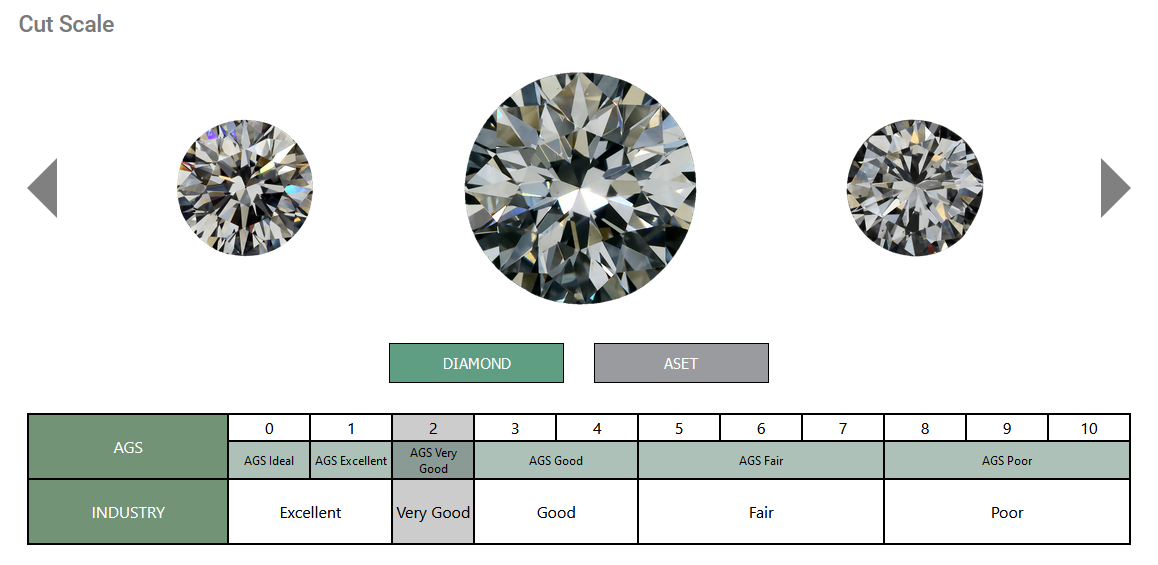

fonte: https://www.americangemsociety.org/buying-diamonds-with-confidence/ags-diamond-grading-system/




## 2\. Número de passageiros em dezembro por ano

In [7]:
import seaborn as sns
#importando o dataframe
data = sns.load_dataset("flights")
data.head(20)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
5,1949,Jun,135
6,1949,Jul,148
7,1949,Aug,148
8,1949,Sep,136
9,1949,Oct,119


In [8]:
#agrupando por mês e ano, e somando os meses
flights = data[['year', 'month', 'passengers']].groupby(['year','month']).agg('sum').reset_index()
flights[['month']].agg('sum')

<ipython-input-8-5b083fdf5248>:3: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  flights[['month']].agg('sum')


Series([], dtype: float64)

In [9]:
#localizando as ocorrências onde o mês for dezembro
voo_dezembro = data.loc[data['month']=='Dec']
voo_dezembro

,year,month,passengers
11,1949,Dec,118
23,1950,Dec,140
35,1951,Dec,166
47,1952,Dec,194
59,1953,Dec,201
71,1954,Dec,229
83,1955,Dec,278
95,1956,Dec,306
107,1957,Dec,336
119,1958,Dec,337


<ipython-input-10-60195d03ea36>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico_voos = sns.relplot(\


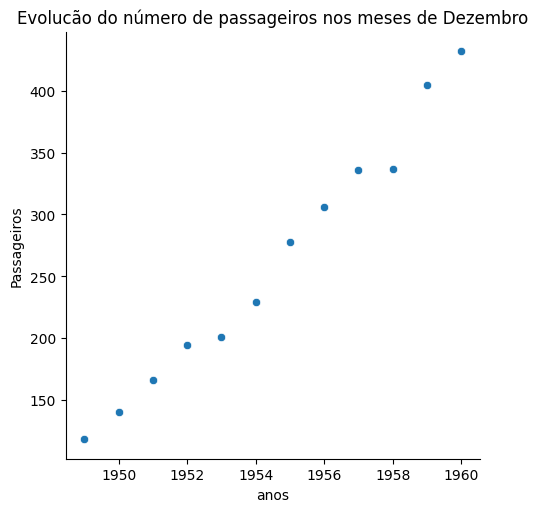

In [10]:
#criando o grafico usando apenas os meses de dezembro
grafico_voos = sns.relplot(\
                           data=voo_dezembro, \
                           x='year', \
                           y='passengers',\
                           palette='ppstel')
grafico_voos.set(\
  title='Evolucão do número de passageiros nos meses de Dezembro',\
  xlabel='anos',\
  ylabel='Passageiros')

<ipython-input-11-59f8d565d739>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico_2 = sns.lineplot\


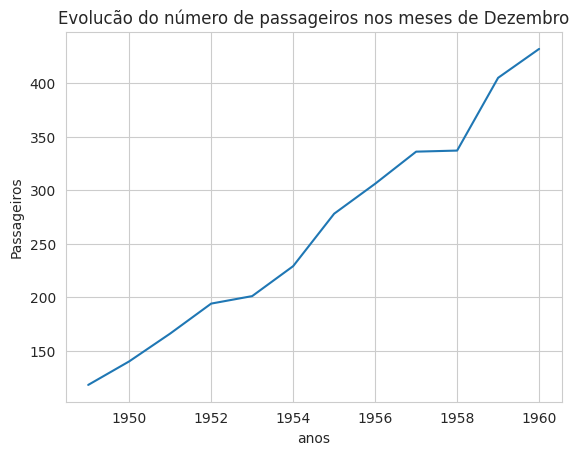

In [11]:
# @title Resolução
with sns.axes_style('whitegrid'):
  grafico_2 = sns.lineplot\
   (data=voo_dezembro, x='year', y='passengers', palette='pastel')
  grafico_2.set\
   (title='Evolucão do número de passageiros nos meses de Dezembro',\
    xlabel='anos',\
    ylabel='Passageiros')

**Insight do Gráico 2** :
  > Vemos que dentre os anos de 50 e 57 o número de passageiros esteve numa tendência crescente, sinalizando para a indústria que o investimento na aviação comercial teria um *grande potêncial de retorno*.



>Dentre 56 e 57 houve uma estagnação no número de passageiros, porém logo no ano seguinte em 1959 houve um aumento expressino no número de passageiros. Isso deve-se a dois fatores principais: primeiro o **lançamento do Boeing 707**, um dos melhores modelos da época; e em segundo a criação de regidos **padrões de segurança para vôos comerciais**, definindo padrões que garantiam a confiabilidade desse meio de transporte.

fonte: [Início da Era do Jato na Aviação Comercial](https://autoentusiastas.com.br/2018/03/aeronaves-do-inicio-da-era-do-jato-na-aviacao-comercial-parte-1/)

---

## 3\. Numero de passageiros por mês entre 1949 e 1959

In [12]:
import seaborn as sns
#importando o dataframe
data = sns.load_dataset("flights")
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [13]:
#filtrando apenas os anos anteriores a 1959
anos_filtrados = data[(data['year'] >= 1949) & (data['year'] <= 1959)]
anos_filtrados

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
127,1959,Aug,559
128,1959,Sep,463
129,1959,Oct,407
130,1959,Nov,362


In [14]:
# Agrupar por mês e calcular a média dos passageiros
agrupamento_mes= anos_filtrados.groupby('month')['passengers'].mean().reset_index()
agrupamento_mes

,month,passengers
0,Jan,225.818182
1,Feb,220.818182
2,Mar,256.636364
3,Apr,249.454545
4,May,253.636364
5,Jun,291.363636
6,Jul,326.727273
7,Aug,327.909091
8,Sep,283.727273
9,Oct,248.909091


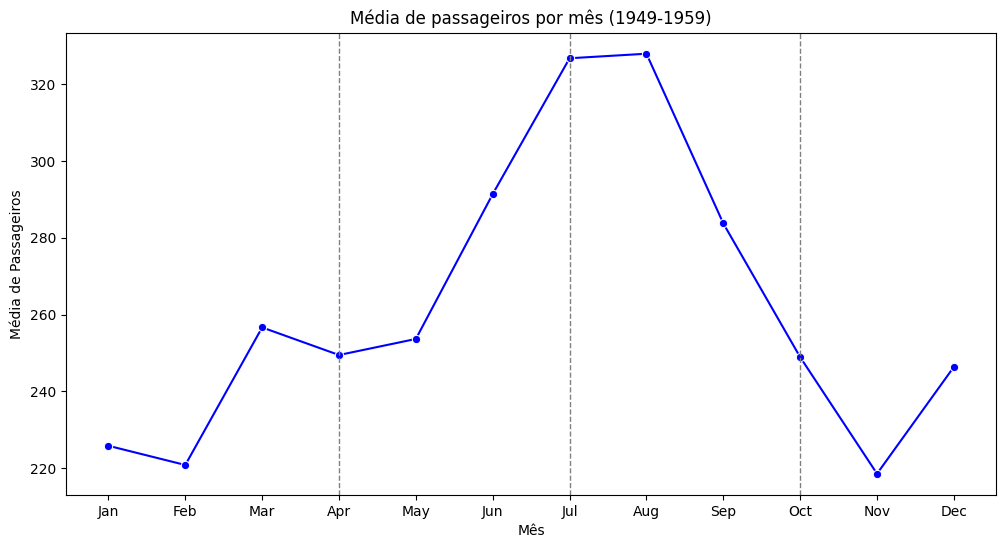

In [15]:
# @title Resolução
plt.figure(figsize=(12, 6))
grafico_3 = sns.lineplot(
    x='month',
    y='passengers',
    data=agrupamento_mes,
    marker='o',
    color='blue')
plt.title('Média de passageiros por mês (1949-1959)')
plt.xlabel('Mês')
plt.ylabel('Média de Passageiros')

for month in[3,6,9]: #criando linhas para dividir os quadrimestres
  grafico_3.axvline(x=month, color='gray', linestyle='--', linewidth=1)

plt.show()

 **Insight do Gráfico 3**:
 >Observando a média de passageiros ao decorrer do ano vemos que elas seguem um padrão com as férias e datas comemorativas:
 * No **primeiro quadrimestre** vemos um número baixo de passageiros, uma vez que após as festas de fim de ano eles voltam a rotina normal de trabalho e estudos.
 * Já no **segundo quadrimestre** vemos um aumento gradual no número de passageiros, que culmina em Julho onde se iniciam as férias de verão (no hemisfério norte).
 * Após as férias no **último quadrimestre** o número de passageiros tende a normalizar em Outubro, para novamente subir em Dezembro com algumas viagens para festas de fim de ano.

 >De modo geral em grande parte do ano o mercado de viagens aéreas, tende a trabalhar com picos de viagens nos meses de férias e uma pequena subina no mês de Dezembro

---